/Users/franzi/anaconda2/lib/python2.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/franzi/anaconda2/lib/python2.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


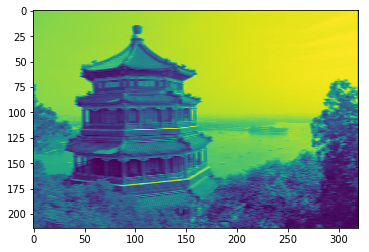

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_images
import tensorflow as tf

# Load sample images
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape
# Create 2 filters
filters_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters_test[:, 3, :, 0] = 1 # vertical line
filters_test[3, :, :, 1] = 1 # horizontal line
# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1,2,2,1], padding="SAME")
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
plt.imshow(output[0, :, :, 1]) # plot 1st image's 2nd feature map
plt.show()

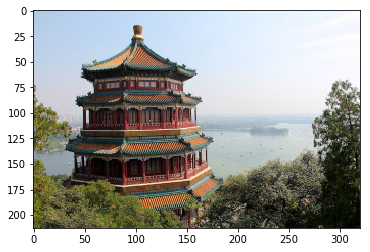

In [32]:
# Create a graph with input X plus a avg pooling layer
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.avg_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
plt.imshow(output[0].astype(np.uint8)) # plot the output for the 1st image
plt.show()

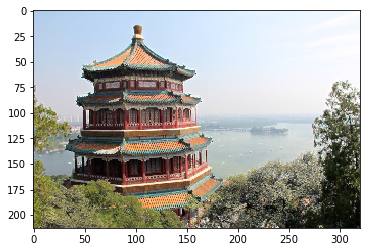

In [35]:
# Create a graph with input X plus a max pooling layer
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
plt.imshow(output[0].astype(np.uint8)) # plot the output for the 1st image
plt.show()